[Notion](https://www.notion.so/aspirina180mg/Soy-Henry-49afb64d6c0641cc80dbc0378dd2db34?pvs=4)

[Kick-Off](https://drive.google.com/file/d/1l1SM-UAw5Mdkr6lmQ9X5UI4cxU_FRg_D/view)

[Slides](https://docs.google.com/presentation/d/1kRrCZDL-ZgZnm4DQ62Ovelf92uP-s4b7cdtp3gkK_kU/edit#slide=id.g2420ab8e36f_0_208)

[Repositorio](https://github.com/soyHenry/PI_DA/tree/Full_Time)

[Rúbrica](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml)

# **EDA**

## **Importación de librerías**

*   `numpy` para realisar cálculos matemáticos y estadísticos.
*   `pandas` para realizar análisis de datos.
*   `matplotlib` para realisar gráficos de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Carga de datos**

### **Se cargan los datos desde archivos parquet pre-procesados.**

*   homicidios se carga en df_homicidios
*   lesiones se carga en df_lesiones

In [2]:
df_homicidios = pd.read_parquet("Datasets/df_homicidios.parquet")
df_lesiones = pd.read_parquet("Datasets/df_lesiones.parquet")

## *Valores atípicos y Outliers*

In [3]:
def identificar_outliers_std(df, columna, threshold=3):
    """
    df: DataFrame
    columna: Nombre de la columna en la que se identificarán los outliers
    threshold: Número de desviaciones estándar por encima o por debajo de la media para considerar un valor como outlier
    """
    promedio = df[columna].mean()
    std = df[columna].std()
    limite_inferior = promedio - threshold * std
    limite_superior = promedio + threshold * std
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

outliers_homicidios_std = identificar_outliers_std(df_homicidios, 'Altura')
print("Outliers en df_homicidios:")
print(outliers_homicidios_std)

outliers_lesiones_std = identificar_outliers_std(df_lesiones, 'altura')
print("\nOutliers en df_lesiones:")
print(outliers_lesiones_std)


Outliers en df_homicidios:
            ID      ACUSADO      FECHA                HORA  COMUNA  \
124  2016-0154         MOTO 2016-11-26 1900-01-01 14:14:00       8   
406  2018-0116       CARGAS 2018-11-01 1900-01-01 10:50:00       8   
442  2019-0008     MULTIPLE 2019-01-30 1900-01-01 22:45:00       8   
671  2021-0052  OBJETO FIJO 2021-06-20 1900-01-01 05:40:00       8   

          LUGAR_DEL_HECHO TIPO_DE_CALLE           Calle   Altura Cruce  \
124     AV GRAL PAZ 15200      GRAL PAZ  PAZ, GRAL. AV.  15200.0  None   
406  Paz, Gral. Av. 14800      GRAL PAZ  PAZ, GRAL. AV.  14800.0  None   
442  PAZ, GRAL. AV. 16080      GRAL PAZ  PAZ, GRAL. AV.  16080.0  None   
671  PAZ, GRAL. AV. 14723      GRAL PAZ  PAZ, GRAL. AV.  14723.0  None   

    Dirección Normalizada      pos x      pos y  N_VICTIMAS VICTIMA  \
124  PAZ, GRAL. AV. 15200 -58.490078 -34.682510           1    MOTO   
406  PAZ, GRAL. AV. 14800 -58.493713 -34.679813           1  PEATON   
442  PAZ, GRAL. AV. 16080 -58.478024 -

Los datos presentados faltantes en la columna "Cruce", por lo que se ignorará esta información faltante por no ser un dato primordial,m se tiene otros datos con los que se puede inferir la ubicación.

In [4]:
print("df_homicidios.info()")
print(df_homicidios.info())
print("\ndf_homicidios.describe()")
print(df_homicidios.describe())
print("\ndf_lesiones.info()")
print(df_lesiones.info())
print("\ndf_lesiones.describe()")
print(df_lesiones.describe())

df_homicidios.info()
<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 716
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     706 non-null    object        
 1   ACUSADO                689 non-null    object        
 2   FECHA                  706 non-null    datetime64[ns]
 3   HORA                   706 non-null    datetime64[ns]
 4   COMUNA                 706 non-null    int8          
 5   LUGAR_DEL_HECHO        706 non-null    object        
 6   TIPO_DE_CALLE          706 non-null    object        
 7   Calle                  706 non-null    object        
 8   Altura                 130 non-null    float32       
 9   Cruce                  535 non-null    object        
 10  Dirección Normalizada  698 non-null    object        
 11  pos x                  695 non-null    float32       
 12  pos y                  695 non-null    float32  

Exploración univariada de df_homicidios:


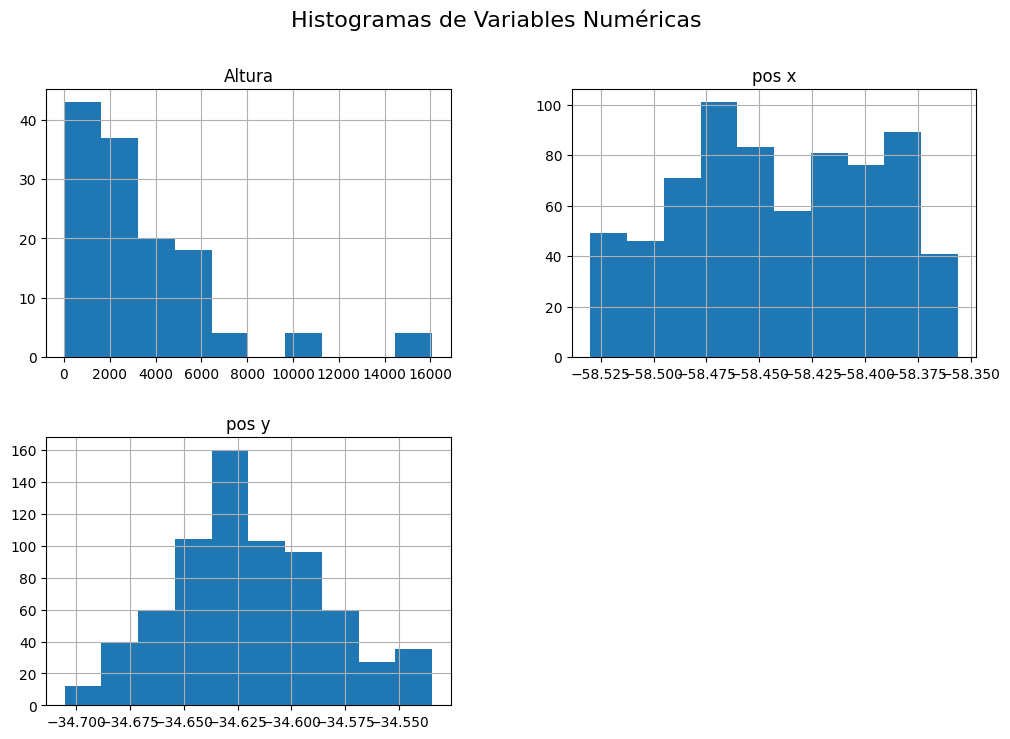

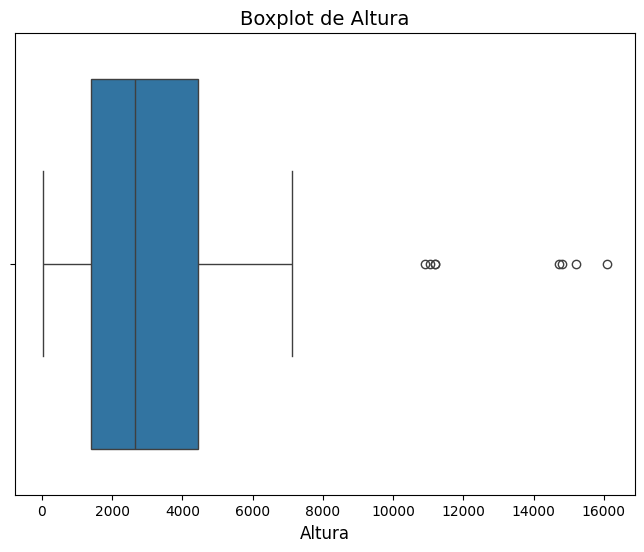

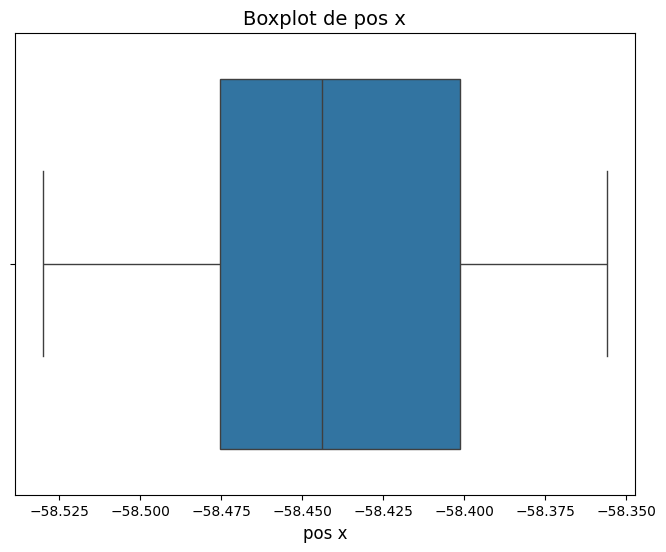

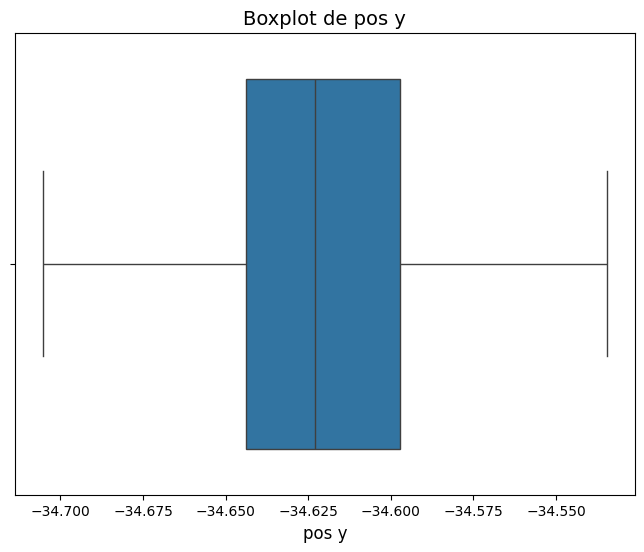

Estadísticas descriptivas de variables numéricas:
                               FECHA                           HORA  \
count                            706                            706   
mean   2018-09-17 00:55:04.249291776  1900-01-01 12:30:43.992918016   
min              2016-01-01 00:00:00            1900-01-01 00:00:00   
25%              2017-04-16 06:00:00            1900-01-01 06:26:15   
50%              2018-07-14 12:00:00            1900-01-01 11:21:00   
75%              2020-01-04 18:00:00            1900-01-01 17:54:45   
max              2021-12-30 00:00:00            1900-01-14 07:12:00   
std                              NaN                            NaN   

           COMUNA        Altura       pos x       pos y  N_VICTIMAS  \
count  706.000000    130.000000  695.000000  695.000000  706.000000   
mean     7.430595   3405.484619  -58.441059  -34.619732    1.062323   
min      1.000000     30.000000  -58.529942  -34.705250    1.000000   
25%      4.000000   1402.5

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


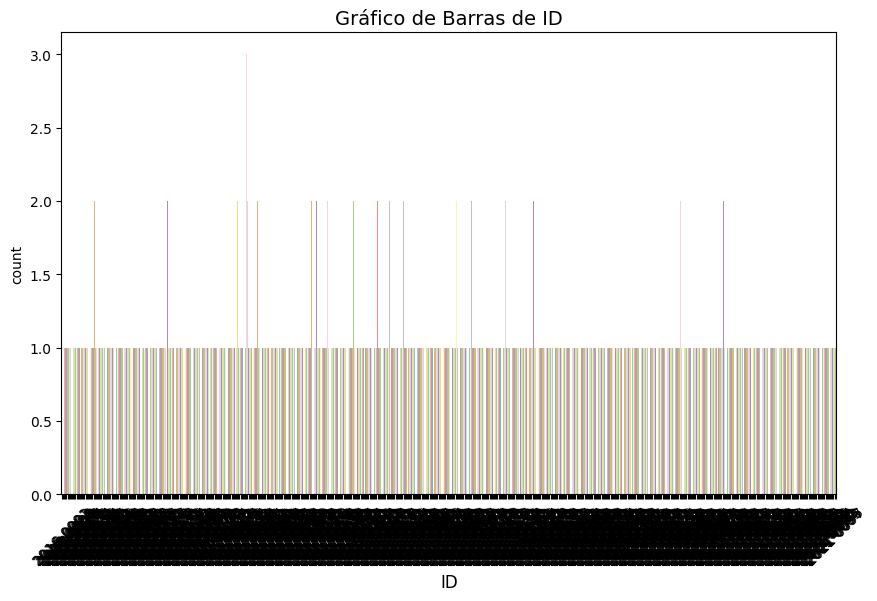

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


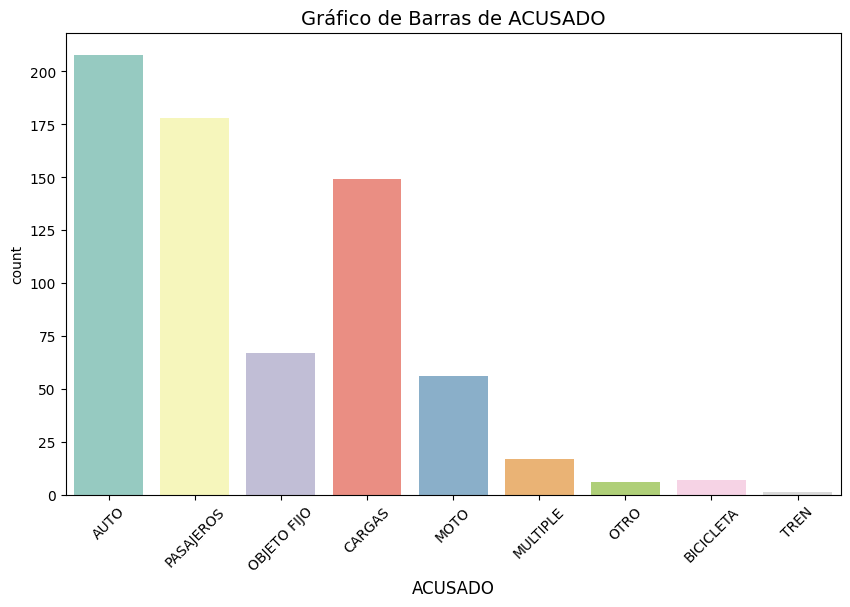

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


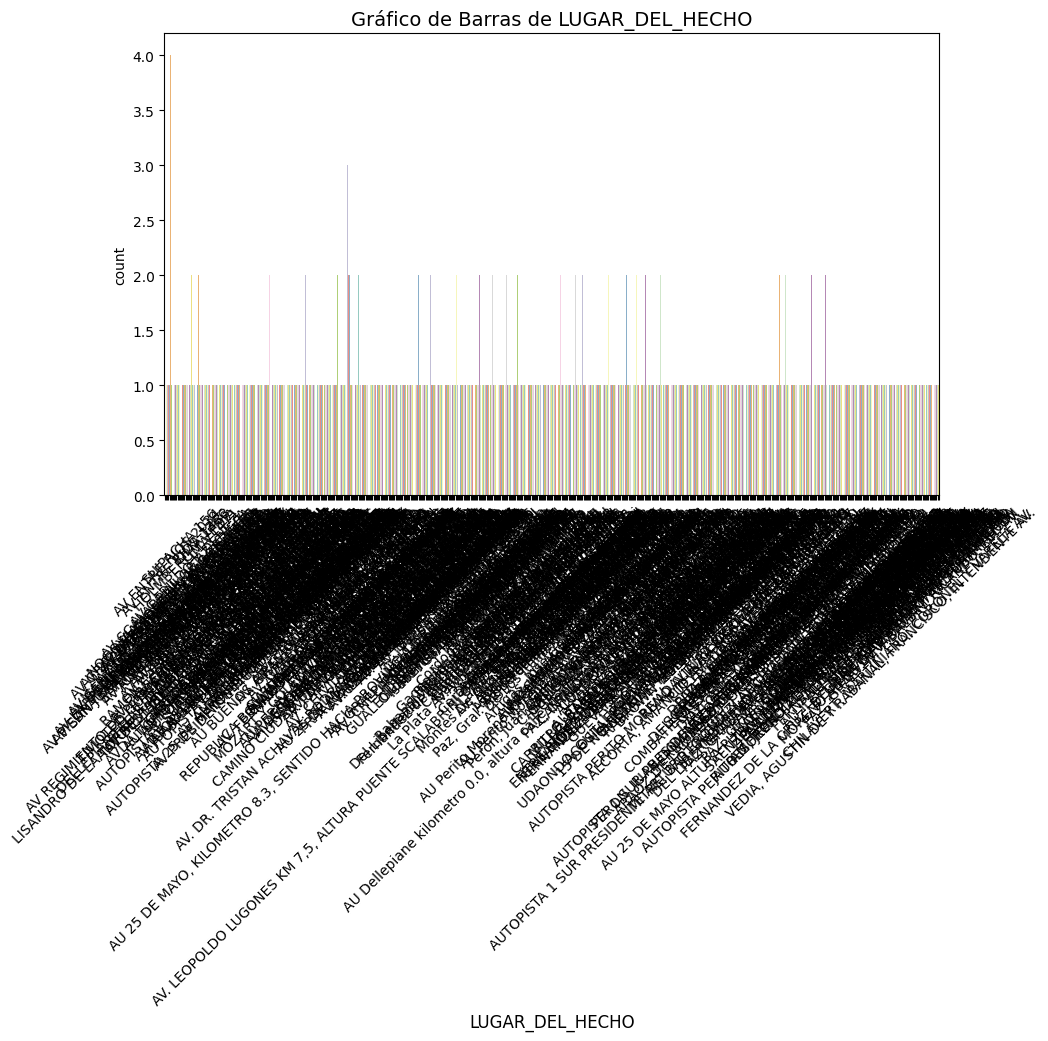

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


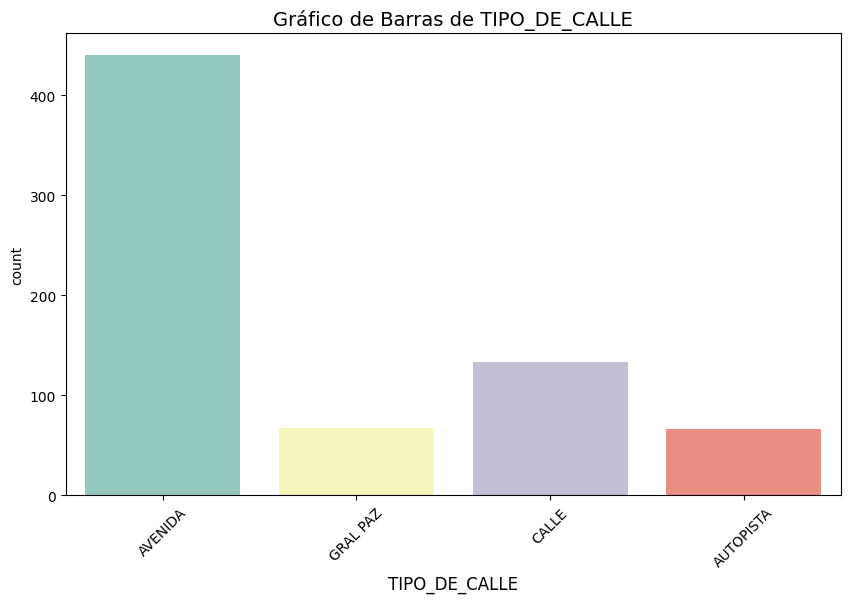

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


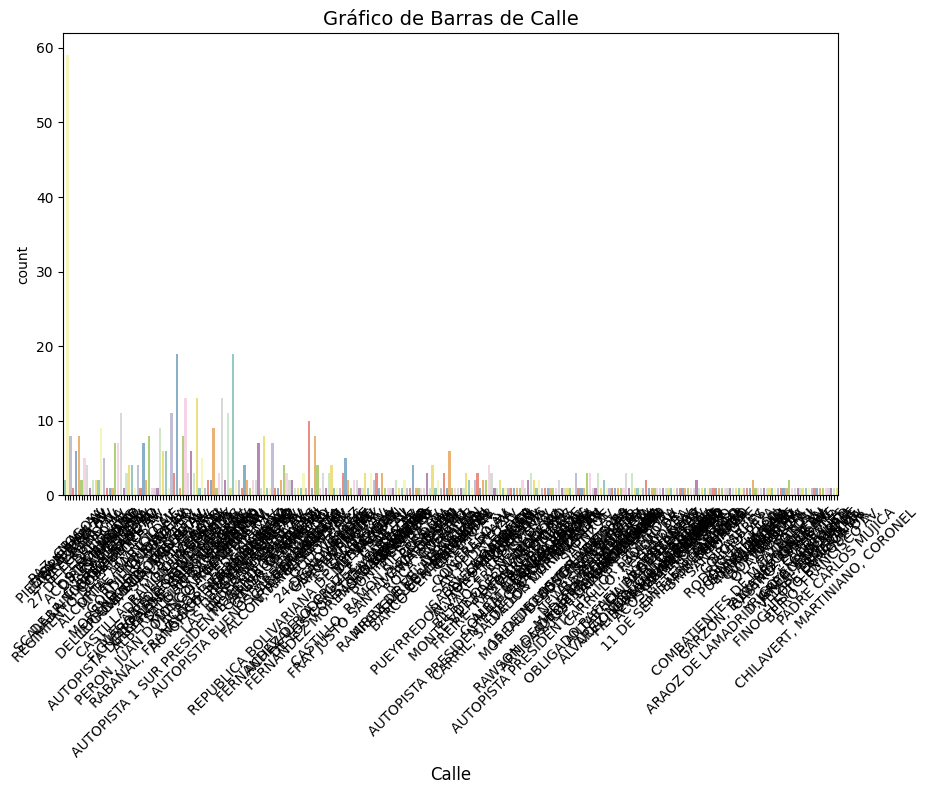

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


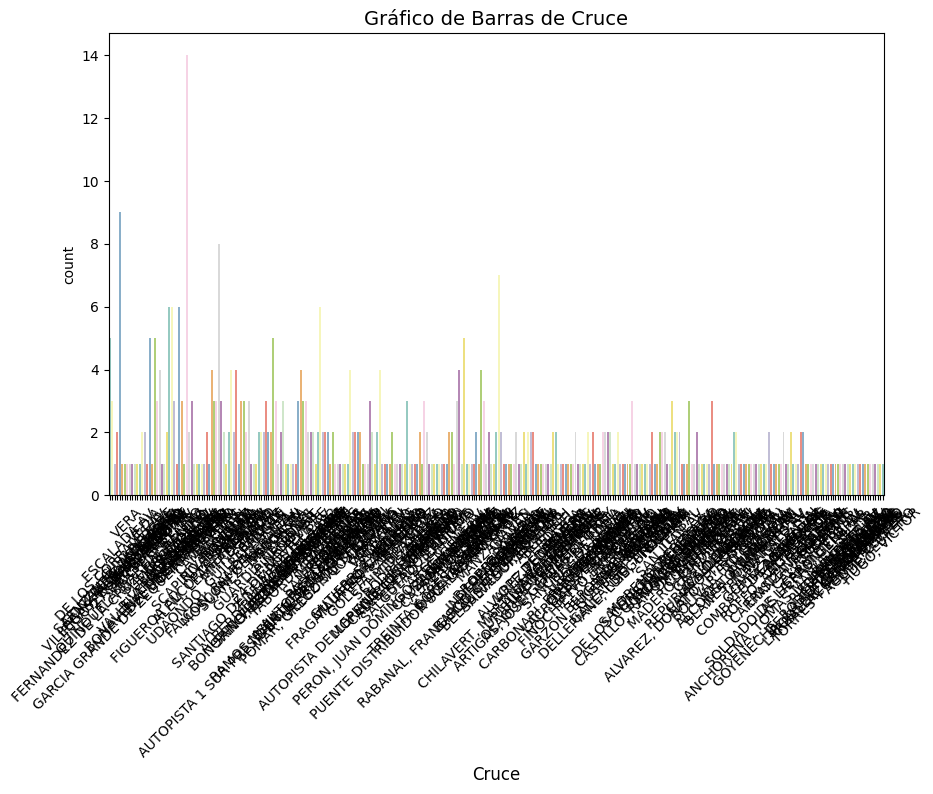

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')
C:\Users\misag\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


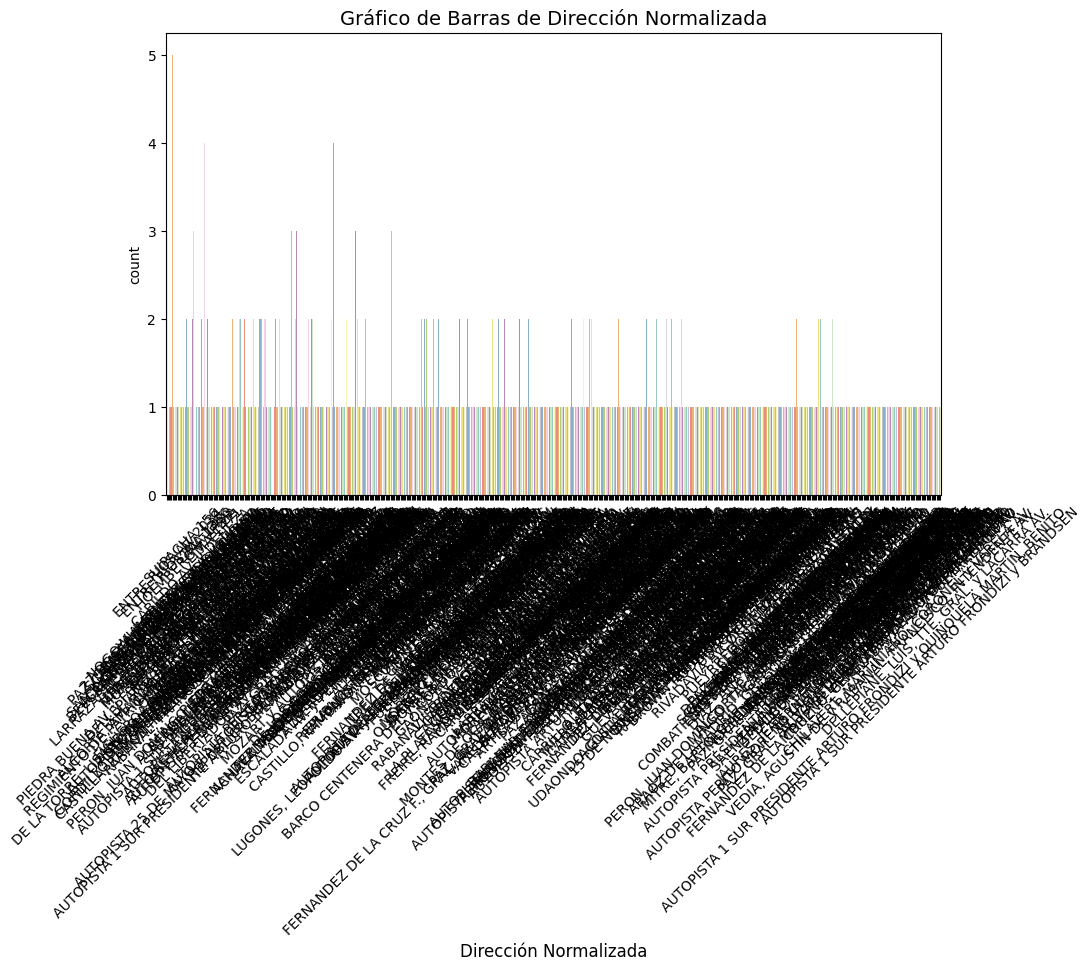

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


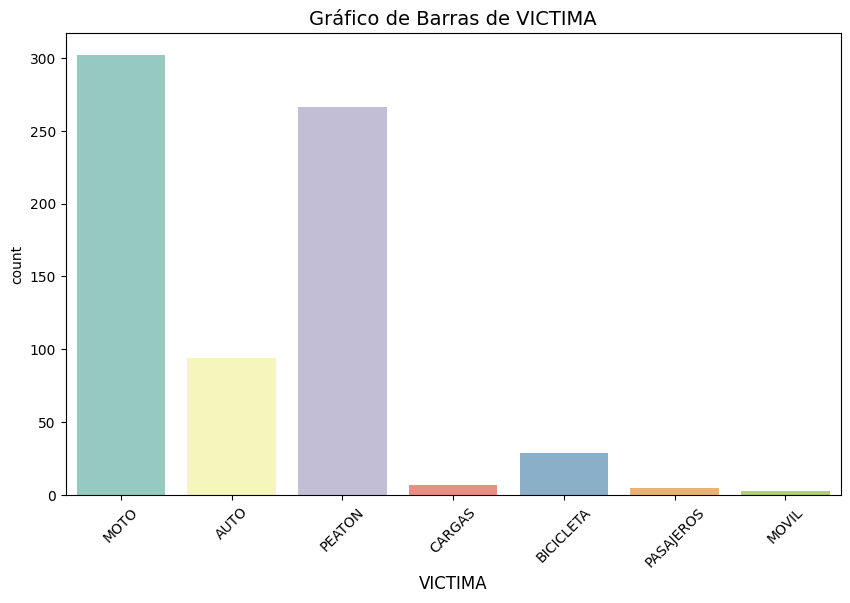

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


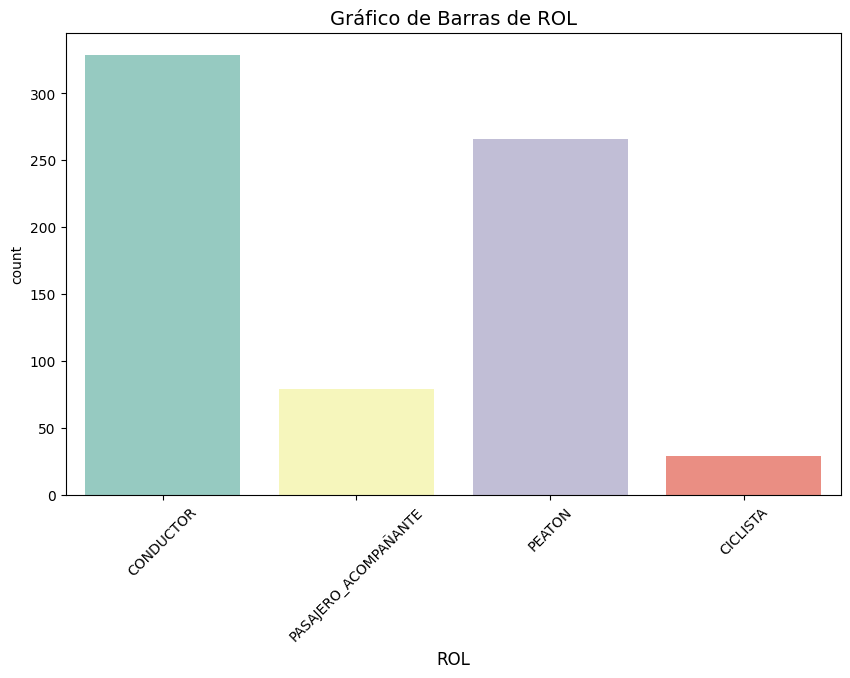

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


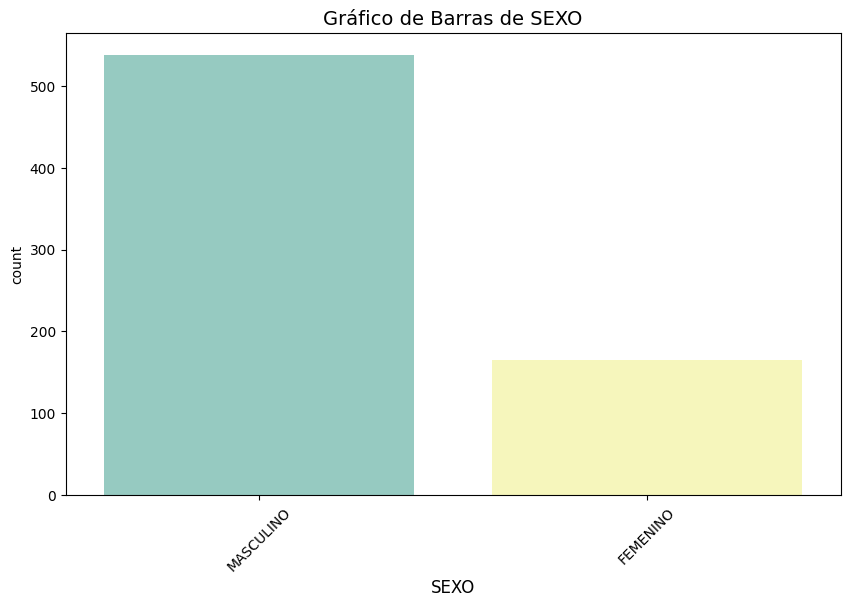

Conteo de valores para variables categóricas:
ID
2017-0035    3
2016-0126    2
2017-0036    2
2017-0112    2
2018-0038    2
            ..
2017-0124    1
2017-0125    1
2017-0127    1
2017-0128    1
2021-0097    1
Name: count, Length: 685, dtype: int64


ACUSADO
AUTO           208
PASAJEROS      178
CARGAS         149
OBJETO FIJO     67
MOTO            56
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64


LUGAR_DEL_HECHO
AV 27 DE FEBRERO Y AV ESCALADA                                 4
AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUCENA VILLAFLOR    3
AV DIRECTORIO Y RIVERA INDARTE                                 2
AV LA PLATA Y CNEL GREGORIO POMAR                              2
AV AMANCIO ALCORTA Y BONAVENA                                  2
                                                              ..
DR. JUAN F. ARANGUREN 611                                      1
AU PERITO MORENO Y AU 25 DE MAYO                               1
CH

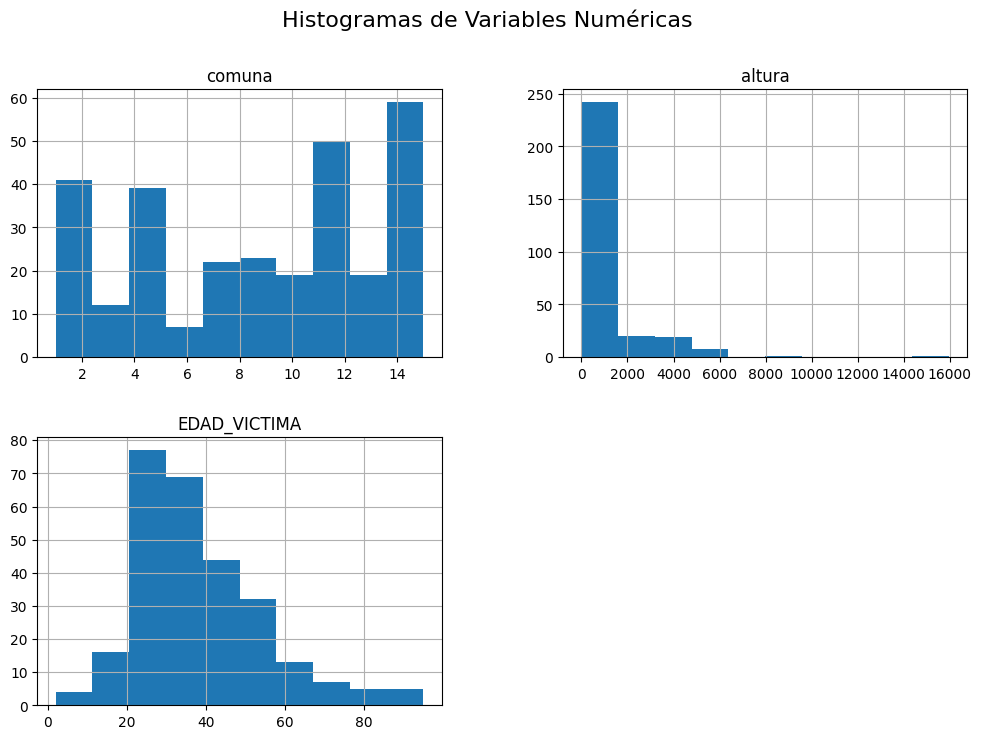

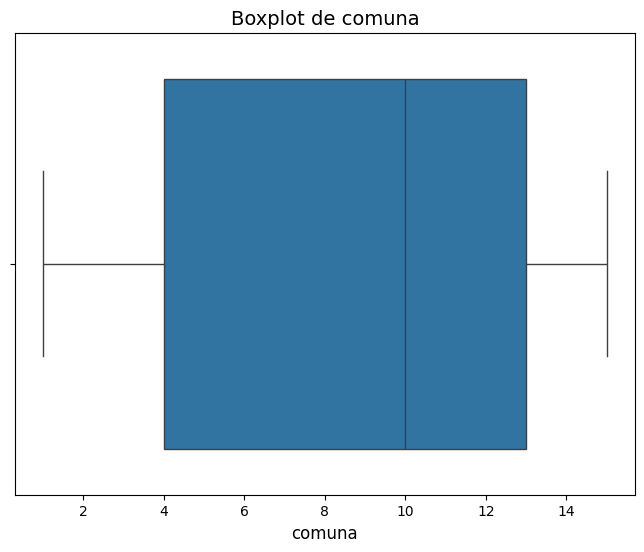

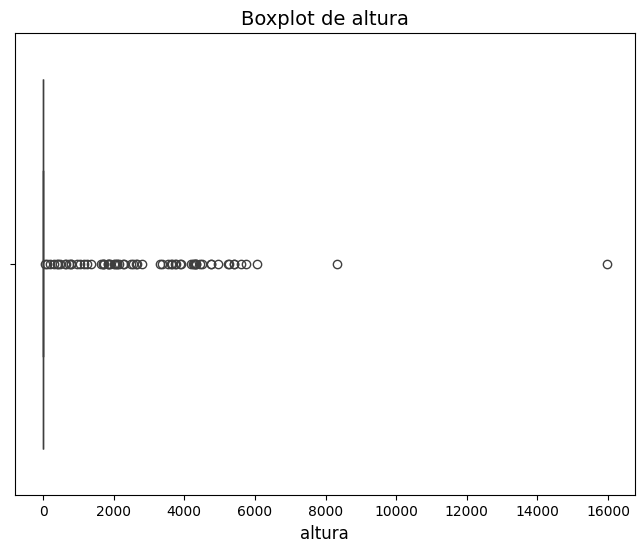

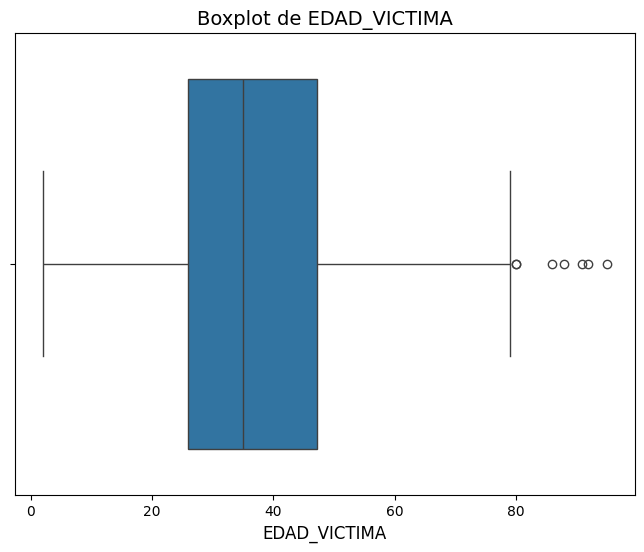

Estadísticas descriptivas de variables numéricas:
                               fecha                    franja_hora  \
count                            291                            291   
mean   2021-01-30 19:42:40.824742144  1900-01-02 09:11:20.412370944   
min              2020-01-02 00:00:00            1900-01-01 00:00:00   
25%              2020-08-29 12:00:00            1900-01-02 04:00:00   
50%              2021-02-18 00:00:00            1900-01-02 10:00:00   
75%              2021-07-29 00:00:00            1900-01-02 16:00:00   
max              2021-12-31 00:00:00            1900-01-02 22:00:00   
std                              NaN                            NaN   

           comuna        altura  n_victimas  EDAD_VICTIMA  
count  291.000000    291.000000  291.000000    272.000000  
mean     8.652921    681.515464    1.360825     38.268383  
min      1.000000      0.000000    1.000000      2.000000  
25%      4.000000      0.000000    1.000000     26.000000  
50%     10

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


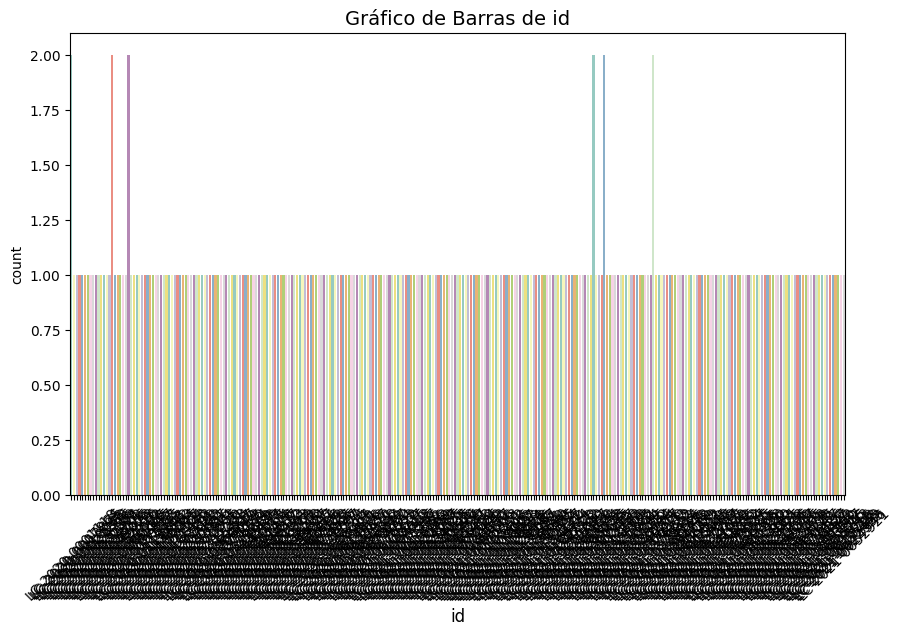

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


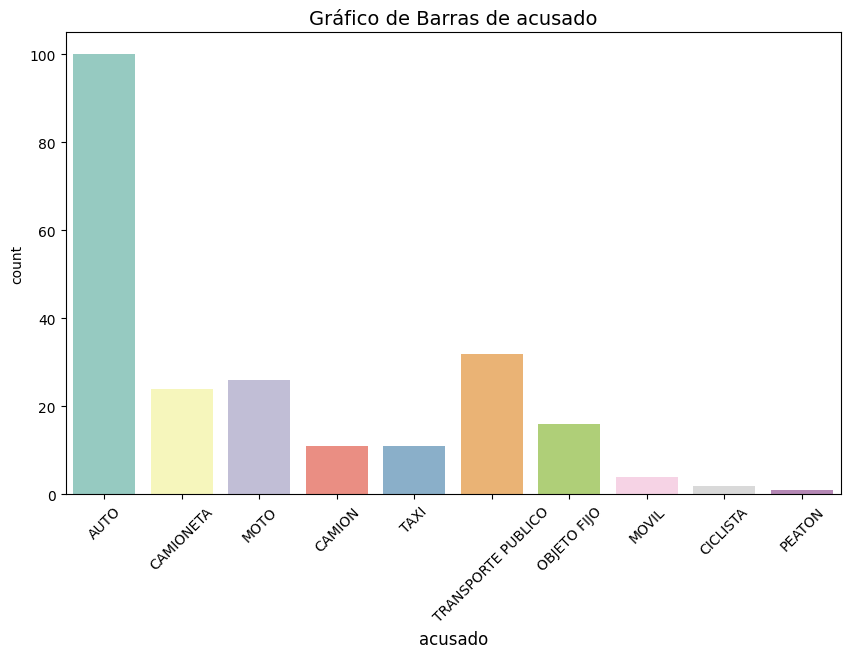

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')
C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=df, x=column, palette='Set3')


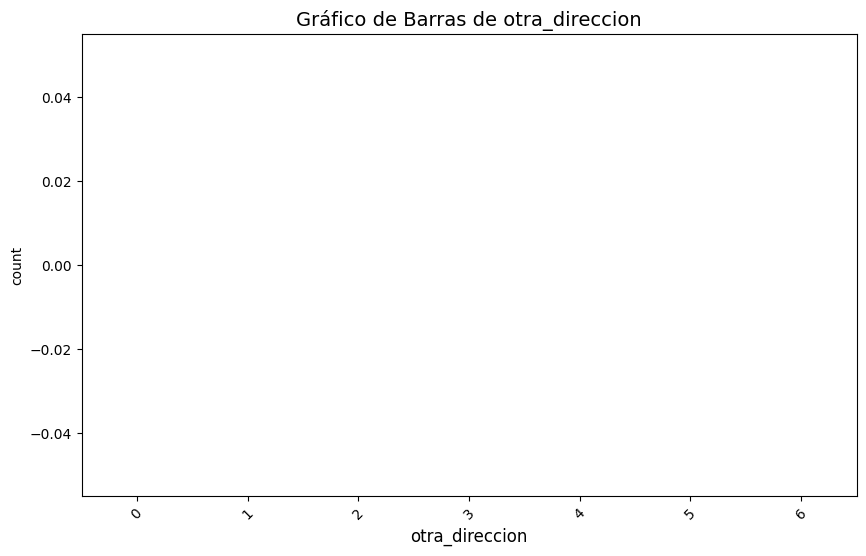

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


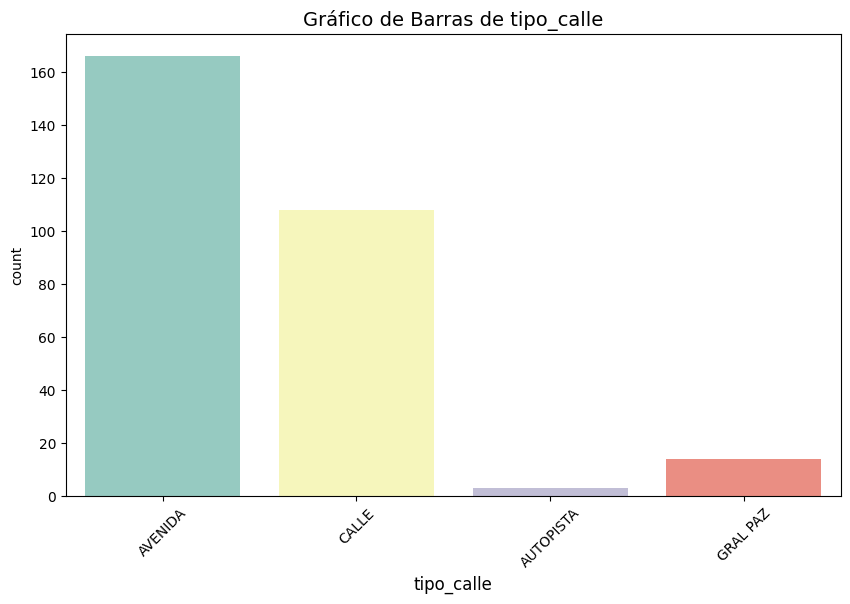

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


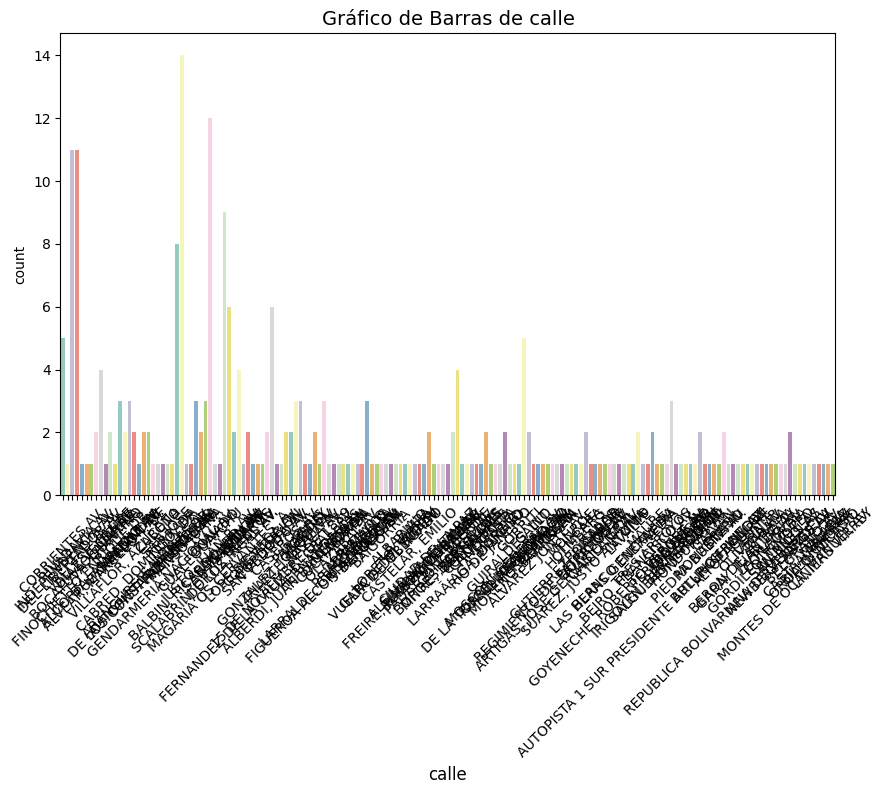

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


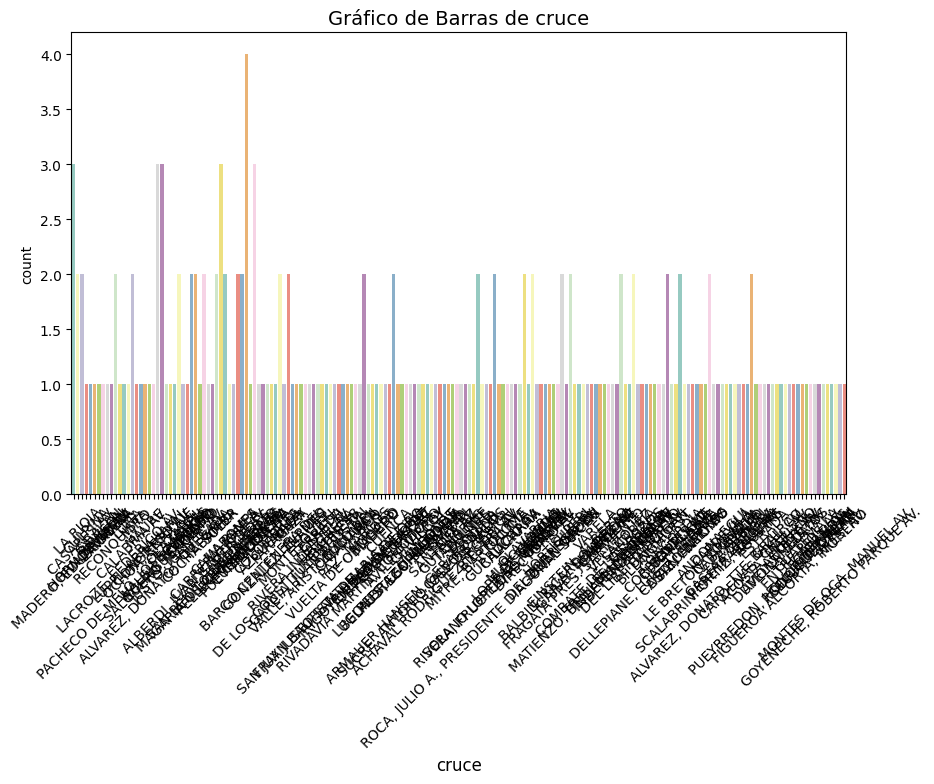

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


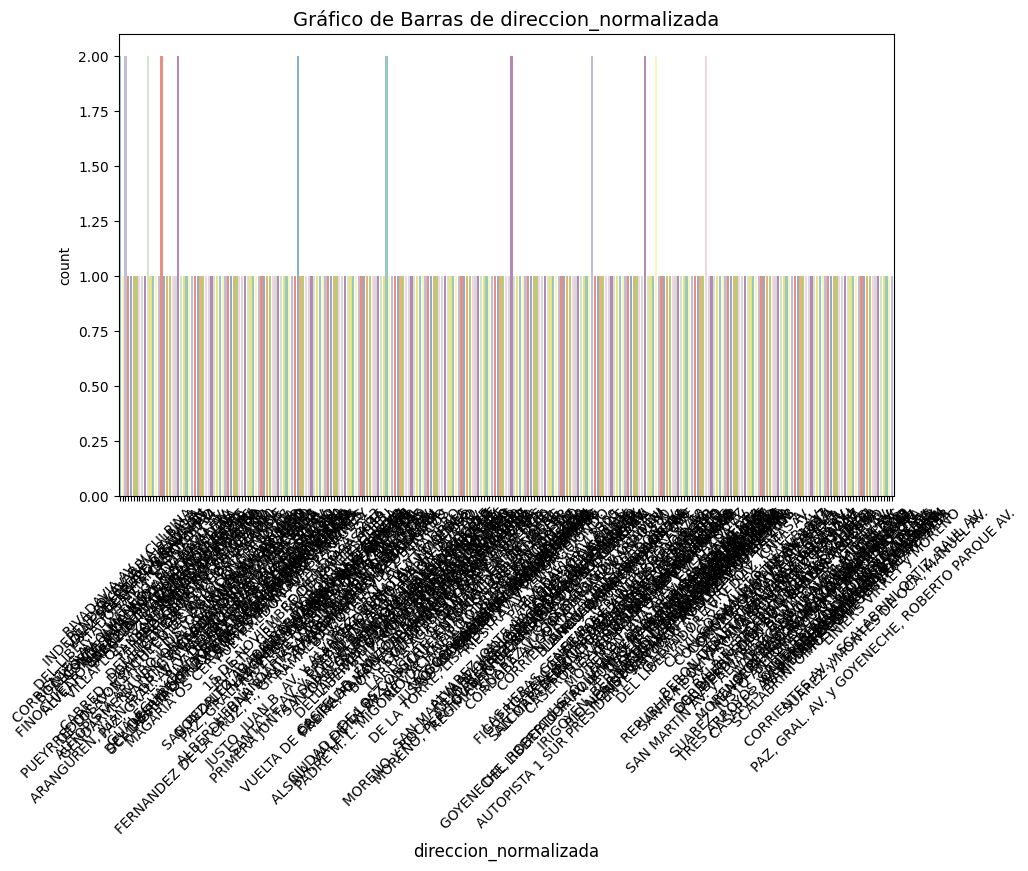

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


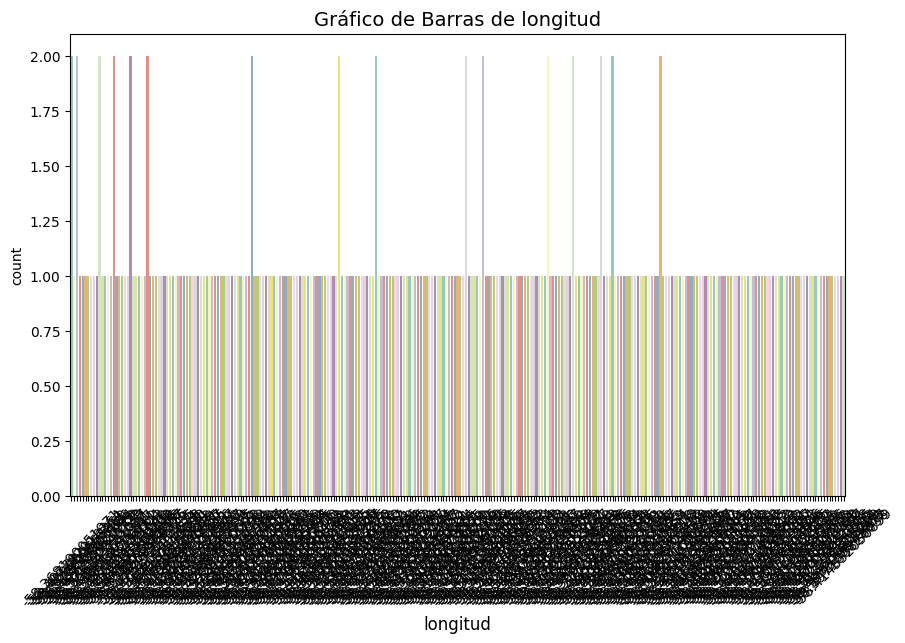

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


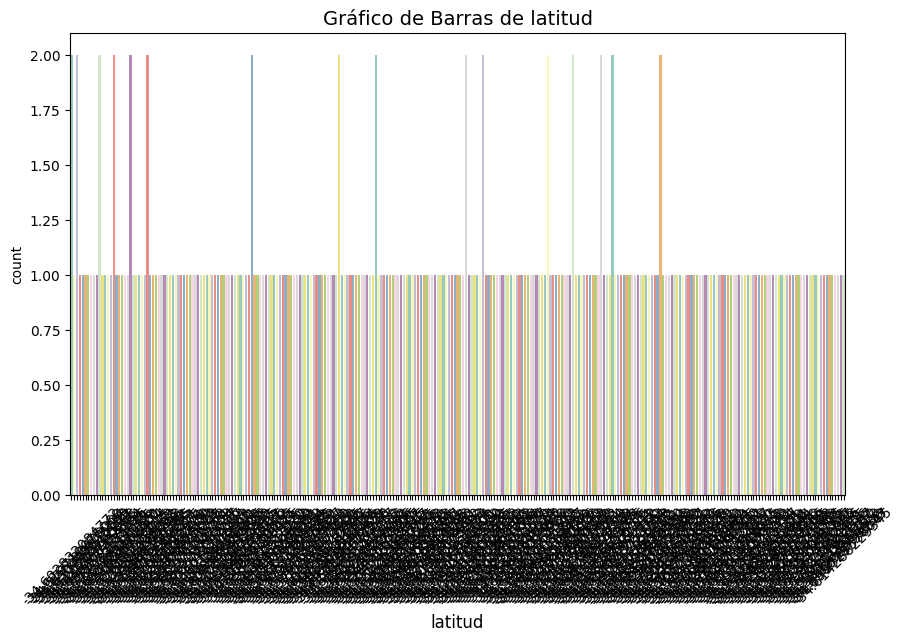

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


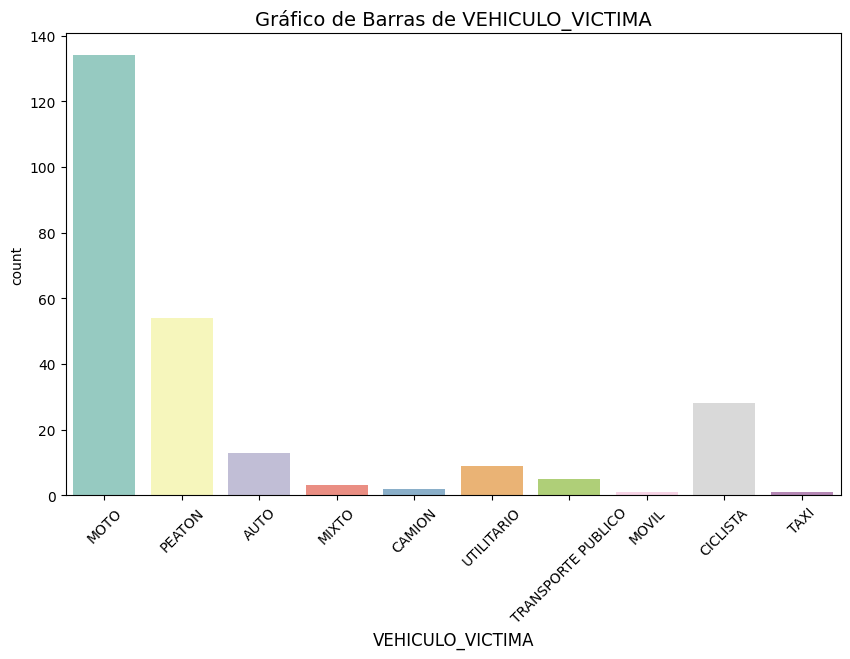

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


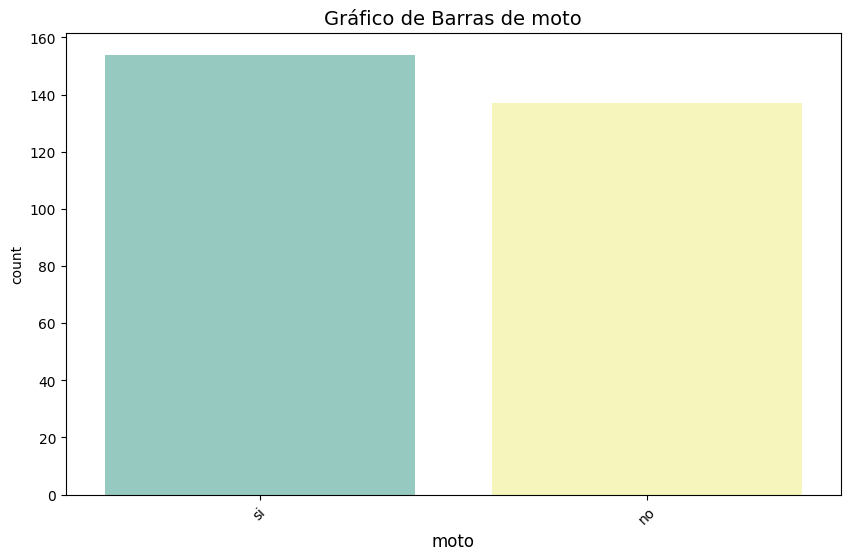

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


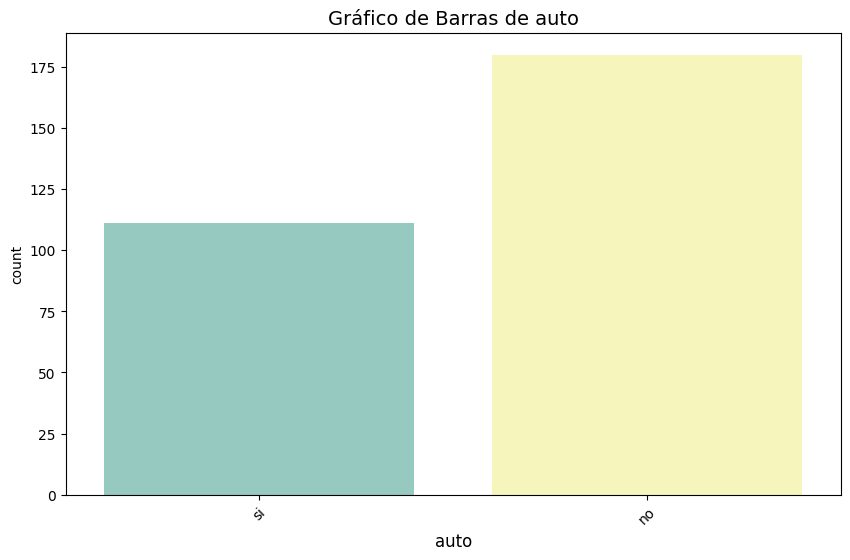

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


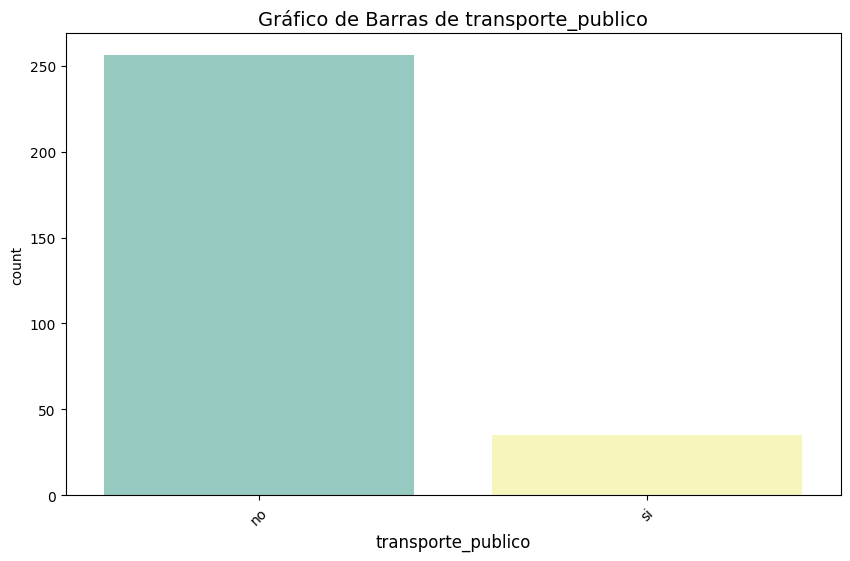

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


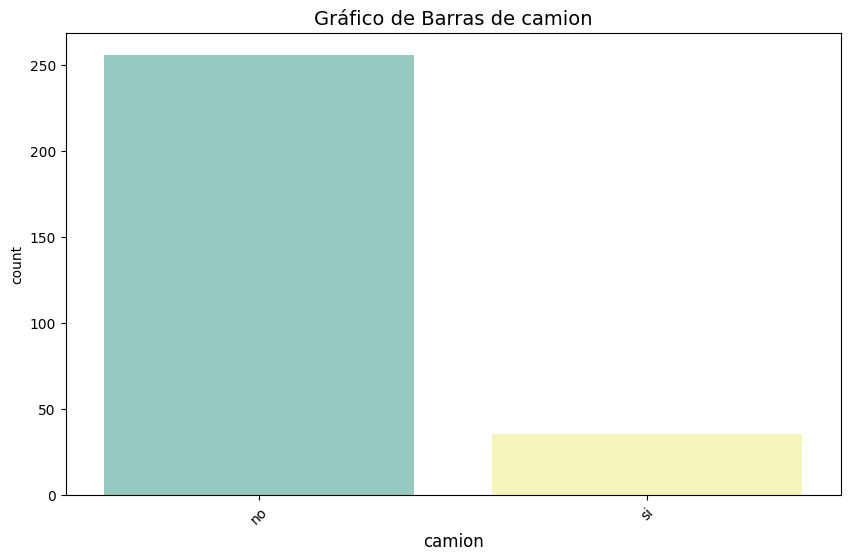

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


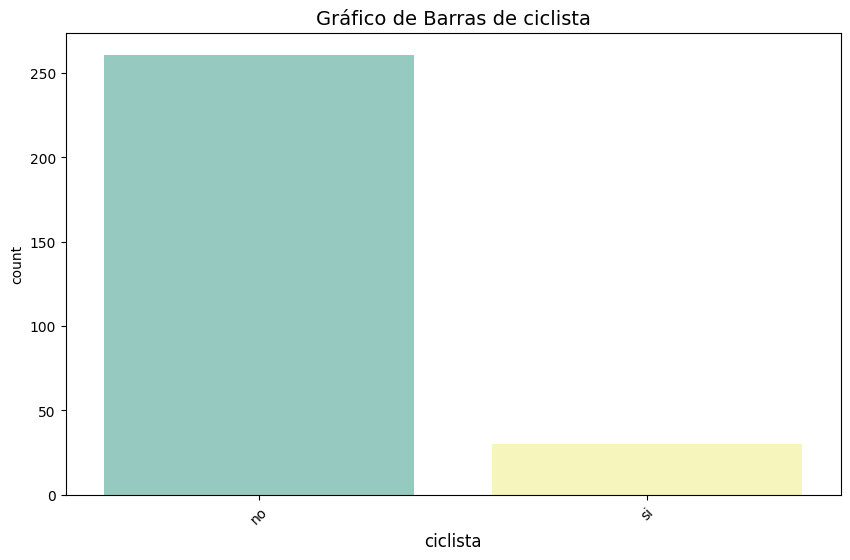

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


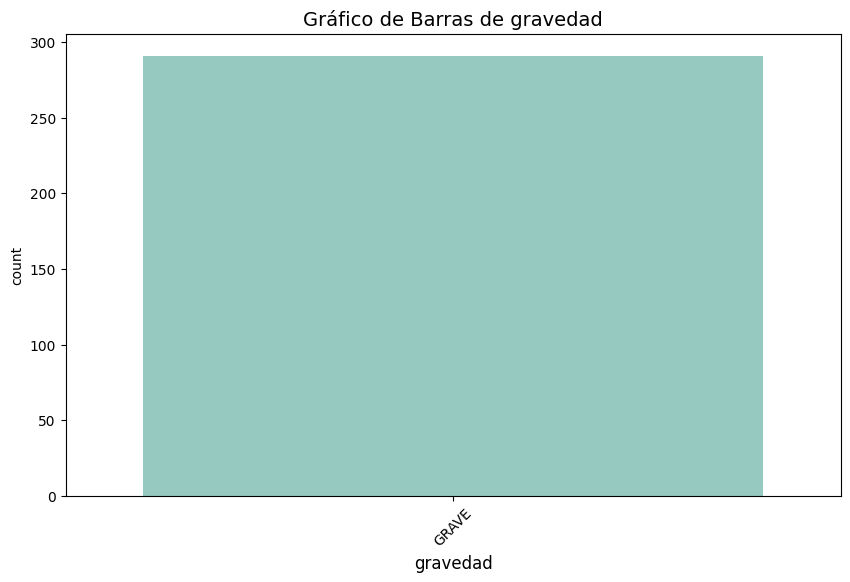

C:\Users\misag\AppData\Local\Temp\ipykernel_17152\2833640509.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set3')


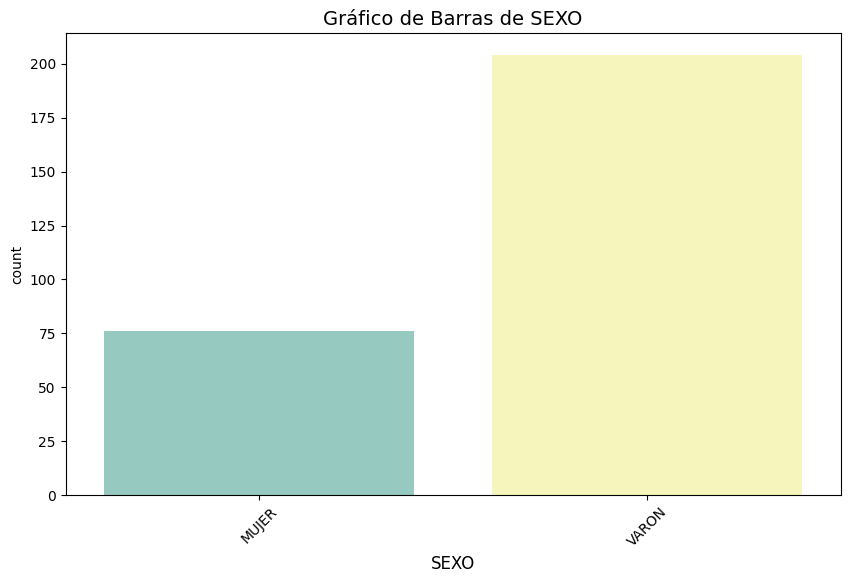

Conteo de valores para variables categóricas:
id
LC-2020-0001118    2
LC-2020-0052516    2
LC-2021-0302958    2
LC-2020-0097837    2
LC-2021-0324329    2
                  ..
LC-2020-0647911    1
LC-2020-0650138    1
LC-2020-0650302    1
LC-2020-0656094    1
LC-2021-0652921    1
Name: count, Length: 285, dtype: int64


acusado
AUTO                  100
TRANSPORTE PUBLICO     32
MOTO                   26
CAMIONETA              24
OBJETO FIJO            16
CAMION                 11
TAXI                   11
MOVIL                   4
CICLISTA                2
PEATON                  1
Name: count, dtype: int64


Series([], Name: count, dtype: int64)


tipo_calle
AVENIDA      166
CALLE        108
GRAL PAZ      14
AUTOPISTA      3
Name: count, dtype: int64


calle
PAZ, GRAL. AV.        14
JUSTO, JUAN B. AV.    12
DEL LIBERTADOR AV.    11
RIVADAVIA AV.         11
SAN MARTIN AV.         9
                      ..
VUELTA DE OBLIGADO     1
BAIGORRIA              1
GUZMAN                 1
PAROI

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para exploración univariada de variables numéricas
def exploracion_univariada_numerica(df):
    # Histogramas
    df.select_dtypes(include=['int', 'float']).hist(figsize=(12, 8))
    plt.suptitle('Histogramas de Variables Numéricas', fontsize=16)
    plt.show()
    
    # Boxplots
    for column in df.select_dtypes(include=['int', 'float']).columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column], orient="h")
        plt.title(f'Boxplot de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.show()
    
    # Estadísticas descriptivas
    print("Estadísticas descriptivas de variables numéricas:")
    print(df.describe())
    print("\n")

# Función para exploración univariada de variables categóricas
def exploracion_univariada_categorica(df):
    # Gráficos de barras
    for column in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, palette='Set3')
        plt.title(f'Gráfico de Barras de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    
    # Conteos
    print("Conteo de valores para variables categóricas:")
    for column in df.select_dtypes(include=['object']).columns:
        print(df[column].value_counts())
        print("\n")

# Exploración univariada de df_homicidios
print("Exploración univariada de df_homicidios:")
exploracion_univariada_numerica(df_homicidios)
exploracion_univariada_categorica(df_homicidios)

# Exploración univariada de df_lesiones
print("Exploración univariada de df_lesiones:")
exploracion_univariada_numerica(df_lesiones)
exploracion_univariada_categorica(df_lesiones)


# **EDA**

   Utiliza gráficos coherentes según la tipología de variable que corresponda.
   Acompaña los gráficos generados con análisis propios, incluso si usas librerías como pandas_profiling.

Exploración univariada:

Analiza cada variable por separado.
Para variables numéricas, utiliza histogramas, boxplots, y estadísticas descriptivas para comprender su distribución y resumen.
Para variables categóricas, utiliza gráficos de barras y conteos para examinar sus frecuencias.
Exploración bivariada:

Examina la relación entre pares de variables.
Utiliza gráficos de dispersión para identificar posibles correlaciones entre variables numéricas.
Para variables categóricas, utiliza tablas de contingencia y gráficos de barras apiladas para analizar su relación.
Exploración multivariada:

Analiza simultáneamente tres o más variables.
Utiliza mapas de calor de correlación para visualizar la correlación entre múltiples variables numéricas.
Emplea técnicas de clustering o análisis factorial si es necesario para comprender la estructura de los datos.
Visualización de datos:

Utiliza una variedad de gráficos y visualizaciones para comunicar tus hallazgos de manera efectiva.
Utiliza bibliotecas como Matplotlib, Seaborn y Plotly para crear gráficos informativos y atractivos.
Interpretación de resultados:

Comprende las implicaciones de tus hallazgos en el contexto del problema que estás abordando.
Formula hipótesis basadas en tus observaciones y prepara la base para análisis y modelado más avanzados.
Documentación:

Documenta todos los pasos que has seguido y los resultados obtenidos.
Esto ayudará a ti y a otros a entender y replicar tu análisis en el futuro.
Realizar un EDA completo y exhaustivo te proporcionará una comprensión sólida de tus datos, lo que te permitirá tomar decisiones informadas en pasos posteriores de tu proyecto de ciencia de datos.

----

# **Enunciado Henry**


Las tasas de mortalidad relacionadas con siniestros viales suelen ser calculadas como el número de muertes por cada cierto número de habitantes o por cada cierta cantidad de vehículos registrados.


## **Contexto**


En Argentina, cada año mueren cerca de 4.000 personas en siniestros viales, Aunque se ha logrado disminuir la cantidad de accidentes de tránsito, esta sigue siendo la principal causa de muertes en el país.
Los informes del Sistema Nacional de Información Criminal (SNIC), del Ministerio de Seguridad de la Nación, revelan que entre 2018 y 2022 se registraron 19.630 muertes en siniestros viales en todo el país. Estas cifras equivalen a 11 personas por día.

Solo en 2022, se contabilizaron 3.828 muertes fatales en este tipo de hechos. Los expertos en la materia indican que en Argentina es dos o tres veces más alta la probabilidad de que una persona muera en un siniestro vial que en un hecho de inseguridad delictiva


## **Rol a desarrollar**


El `Observatorio de Movilidad y Seguridad Vial` (OMSV), centro de estudios que se encuentra bajo la órbita de la **_Secretaría de Transporte_** del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.
Para ello, nos disponibilizan un dataset sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021. Este dataset se encuentra en formato _xlsx_ y contiene dos hojas llamadas: **hechos** y **víctimas**. Asimismo, observarán que incluye otras dos hojas adicionales de diccionarios de datos, que les podrá servir de guía para un mayor entendimiento de la data compartida.


# **Propuesta de trabajo -mínimos entregables-**


_Es importante que a la hora de empezar a desarrollar cada item, y tu demo, te ayudes tambien de la [rúbrica de evaluación](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml)._ 😄


## `EDA` (Exploratory Data Analysis)


Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: _búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados_. Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

**_En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios._**

- Revisar por Estacionalidad

- [dale un vistazo al workshop de preprocesamiento](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)

* La elección de gráficas se corresponde al tipo de variable y representa apropiadamente lo que pretende. Contiene todos los elementos visuales adecuados para lograr una comunicación efectiva: el estilo es uniforme/consistente, la escala utilizada es adecuada y los titulos de ejes y etiquetas son descriptivos. Además, el idioma y la denominación de las variables se encuentran unificados.

* "EDA en notebook completo: aborda outliers, duplicados, valores faltantes y gráficos pertinentes con el tipo de variable (cualitativa/cuantitativa) demostrando que comprende la diferencia entre ambas.

* Cada gráfico está acompañado de análisis profundos y conclusiones acordes a lo que se está analizando.

* Se hace uso completo de markdowns para documentar el análisis, siguiendo un paso a paso estructurado y justificando las decisiones tomadas. El notebook contiene todos los outputs ejecutados y se evitan mensajes de ""warnings"", asegurando un análisis exhaustivo y sin interrupciones. "


## `Dashboard`


Debe ser funcional y coherente con el storytelling. El dasbhoard tiene que incluir **filtros**, permitiendo explorar detalladamente los datos con la selección de cada uno de ellos. Es decir, es indispensable que sea **interactivo**. También, se espera que el diseño que implementen facilite la interpretación de la información y su análisis, siendo importante, para ello, la claridad en la presentación de los datos, aspectos inherentes a la esteticidad, elección coherente de los gráficos según las variables a visualizar, entre otros ítems.

- [Utiliza el workshop de streamlit para aprender](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)
- [Debes ver el workshop de Data to Viz y Storytelling, ayudará a crear el dashboard](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)
- El Dashboard refleja lo del eda, pero más boniti
- Considera agregar botones de navegación, dan un plus
- Hacerlo en modo obscuro(?) (será mejor hacerlo cambiable?)
- KPi primero o después? qué quiero para mi Storytelling?

* El dashboard es altamente interactivo: los filtros, selecciones y acciones implementadas son eficientes y se pueden utilizar estratégicamente para mostrar información clave y agregar valor el análisis. Además, la UX es positiva: su navegación es intuituva y la comprensión de las funciones no requiere instrucciones adicionales
* Demuestra una clara comprensión del propósito de un dashboard como un tablero de control. Muestra una visión general de los datos y proporciona información clave para la toma de decisiones. El dashboard está diseñado de manera coherente con ese propósito y se enfoca en los indicadores clave relevantes para el análisis y el planteamiento del rendimiento respecto al objetivo (KPIs bien representados).
* La disposición y el diseño de la información es excelente y facilita su comprensión. Los elementos están alineados y la elección de colores y tipografía son consitentes a lo largo de todo el dashboard, facilitando la legibilidad de la información y creado una visual ordenada y de apariencia profesional. Además, se uitlizan técnicas de diseño (como tamaño, color, posición) de forma estratégica, logrando guiar la atención del usuario hacia la información relevante.
* La elección de gráficas se corresponde al tipo de variable y representa apropiadamente lo que pretende. Contiene todos los elementos visuales adecuados para lograr una comunicación efectiva: el estilo es uniforme/consistente, la escala utilizada es adecuada y los titulos de ejes y etiquetas son descriptivos. Además, el idioma y la denominación de las variables se encuentran unificados.


## `Análisis` :warning:


No se considerará solamente la producción de gráficos con datos -dashboard-, sino también los análisis y conclusiones que puedan extraer a partir de ellos.


## `KPIs`


Debes graficar y medir los 2 KPIs propuestos a continuación, representándolos adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un tercer KPI que consideres relevante para la temática.
Los dos KPIs propuestos son:

- _Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en Ciudad Autónoma de Buenos Aires (CABA), en comparación con la tasa de homicidios en siniestros viales del semestre anterior_.

  Definimos a la **tasa de homicidios en siniestros viales** como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
  Su fórmula es: (Número de homicidios en siniestros viales / Población total) \* 100,000

- _Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en Ciudad Autónoma de Buenos Aires (CABA), respecto al año anterior_.

  Definimos a la **cantidad de accidentes mortales de motociclistas en siniestros viales** como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal.
  Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) \* 100

`MUY IMPORTANTE` repasar qué es un KPI y cómo se diferencia de una métrica convencional. En el material de apoyo tienen lectura que puede ser de ayuda.</small>

- Se utilizan como mínimo 3 KPIs de manera adecuada y se integran en el dashboard del proyecto de análisis de datos. El estudiante puede explicar y defender la elección y utilización de los KPIs seleccionados.

- Además, demuestra un sólido entendimiento de la distinción conceptual entre métrica y KPI, evidenciado por la correcta selección de visualización para cada KPI, utilizando gráficos o representaciones visuales apropiadas.

MI KPI!!!!

- Buscar la comuna con más accidentes
- Buscar las comunas por sobre el promedio
- Aplicar Valores y Porcentajes
- Piensa en Cajas y Bigotes


## `Repositorio de GitHub`


El repositorio debe contener un **Readme** principal donde presenten, en una primera instancia, de forma general **su proyecto** y detallen qué hay en cada archivo/carpeta del propio repositorio. Este Readme no puede ser el mismo de la consigna que nosotros les entregamos.
A su vez, el Readme debe incluir un **reporte de análisis con base en sus dashboards**, así como el análisis y la funcionalidad de los KPIs sugeridos.

- El Readme.md del proyecto va más allá de los requisitos mínimos. Proporciona una descripción detallada y completa del proyecto, incluyendo una presentación clara y concisa del mismo. Se mencionan las tecnologías y herramientas utilizadas en el proyecto, así como la metodología aplicada de manera exhaustiva.

- Además, se presentan análisis detallados y conclusiones fundamentadas que demuestran un profundo entendimiento de los datos analizados.


## _**Desafíate y no te quedes siendo Junior, sé Junior Advanced**_


Pensando en alcanzar tu Boom 🚀, te recomendamos incorporar los siguientes desafíos para tener un portfolio mucho más completo y competitivo:

- Crear una base de datos en un motor SQL, ingestar el dataset procesado y utilizarla como fuente de datos de su dashboard en Power BI (o la herramienta de visualización que utilice).
- Ejecutar scripts de Python en la herramienta de visualización de datos escogida.
- Cruce de datos con datasets complementarios, ya sea para obtener información nueva o poder comparar la información disponible para todas las plataformas.

<sub> Nota: la realización de uno o más de estos ítems no es intercambiable con los requerimientos mínimos establecidos en la sección anterior "Propuesta de trabajo". Empiece con esta sección una vez haya cumplido con los requerimientos mínimos, a modo de desafiarse a usted mismo y destacar frente al resto.</sub>


# Fuente de datos


## **Obligatorio:**


- [Buenos Aires Data](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales): deberán utilizar el dataset denominado `Homicidios`


## **Complementarios:**


- [Buenos Aires Data](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales): pueden usar el dataset de `Lesiones`
- Cualquier dataset de búsqueda propia que complemente y mejore el análisis. Recuerde el uso de [APIs y WebScrapping](https://www.students.soyhenry.com/classes/95?cohortId=124&videoOrdinal=2)


# Lo que tendremos en cuenta a la hora de evaluar


Serás evaluado en dos grandes áreas `Tech` y `Soft`!

Ambas con igual peso entre si y ambas deben ser aprobatorias para tener la calidad de aprobado en este PIDA. Ten presente que una nota minima para aprobar significa tener TODOS los items como "Bueno" 👌
A continuacion te facilitamos nuevamente la [rúbrica de evaluación](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml) con la que seras evaluado por tu corrector@. Recuerda que el feedback de tu corrector@ no es en ningun momento un indicativo de tu nota. Si tienes alguna duda durante tu DEMO, pidele a tu corrector@ que te aclare claramente cuales son los objetivos de aprendizaje no cumplidos.

Esperamos que te sirva de guia de aprendizaje, y recuerda que no se trata solo de cumplir requisitos, sino de destacar en cada nivel 🚀 💛


## Material de apoyo


- [Notas para el uso del dataset de homicidios de siniestros viales de la CABA](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/NOTAS_HOMICIDIOS_SINIESTRO_VIAL.pdf)
- [Observatorio de Movilidad y Seguridad Vial de la Ciudad Autónoma de Buenos Aires](https://buenosaires.gob.ar/observatorio-de-movilidad-y-seguridad-vial)


## Tech


- [Repaso de clase sobre EDA](https://www.students.soyhenry.com/classes/100?cohortId=106&videoOrdinal=1)
- [Code Review: **Interactividad** Dashboard, Patron Z, **Tooltips**](https://www.students.soyhenry.com/classes/93?cohortId=124&videoOrdinal=2)
- [KPI's 4 students](https://docs.google.com/document/d/1DI0ZVgHfOfjgnXGhi8jEKzwCIjtUdgRUDe-qiiGGq8E/edit)
- [Code Review: DAX y **medidas calculadas**](https://www.students.soyhenry.com/classes/96?cohortId=124&videoOrdinal=2)


## Soft


- ¡Todos los Workshops de esta etapa serán de gran utilidad para tener un proyecto exitoso!

* [Practice to perfect](https://vimeo.com/906514592/1ae3a5de05?share=copy)

Análisis

- Su análisis agrega un valor significativo a los datos. Logra incluir una contextualización sólida y realiza cruces de datos con otras fuentes relevantes. Presenta perspectivas de análisis creativas, elaborando conclusiones que son novedosas y aportan una comprensión más profunda del tema.

Oralidad

- Articula el discurso de manera fluida, sin interrupciones. Lo hace con confianza y utilizando un lenguaje apropiado y preciso.

Storytelling

- Adopta el rol de un analista de datos de manera efectiva. Su discurso sigue un esquema claro y coherente, con un hilo conductor bien definido. Presenta un mensaje claro y un argumento sólido que conecta con la audiencia. Utiliza técnicas de narración y recursos visuales adecuados para enriquecer la presentación y mantener el interés de la audiencia.

Recepción de feedback

- Se muestra predispuesto y receptivo. Escucha con entusiasmo sus oportunidades de mejora

Puntualidad

- Está disponible a la hora pactada.

Preparación

- El estudiante realiza la exposición respetando el tiempo estipulado. Muestra un entorno organizado y libre de distracciones. Además, domina las herramientas y recursos utilizados, y ha configurado todos los aspectos técnicos necesarios para la exposición se desarrolle sin inconvenientes.

* Storytelling
* contexto
* "mi proyecto trata de vialidad de CABA... (que me entregaron ustedes)"
* estos son los insights que pude destacar
* conclusión
